In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

os.chdir('..')

In [3]:
from src.models.exif_sc import EXIF_SC
import torch
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [4]:
model = EXIF_SC("artifacts/exif_sc.npy", device="cuda:1")

In [5]:
img_cv = cv2.imread("data/demo.png")[:, :, [2, 1, 0]]  # [H, W, C]
img = torch.from_numpy(img_cv).permute(2, 0, 1)  # [C, H, W]

In [6]:
start = time.time()
out_ms, out_ncuts = model.predict(img, use_ncuts=True, blue_high=True)
end = time.time()
print(end - start)

43.39667248725891
/home/yizhe/miniconda3/envs/fake-detection-lab/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


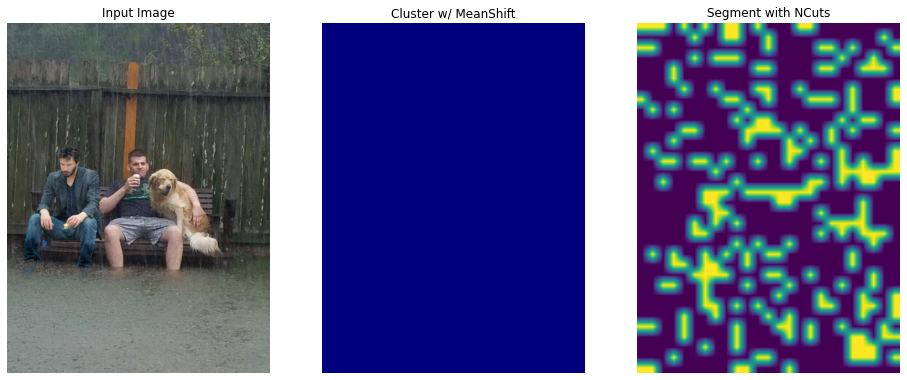

In [7]:
plt.subplots(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(img_cv)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Cluster w/ MeanShift')
plt.axis('off')
plt.imshow(out_ms, cmap='jet', vmin=0.0, vmax=1.0)

plt.subplot(1, 3, 3)
plt.title('Segment with NCuts')
plt.axis('off')
plt.imshow(out_ncuts, vmin=0.0, vmax=1.0)

plt.show()